In [2]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

import sys, os
sys.dont_write_bytecode = True
import conditions, analysis

import random
random.seed(1107)
np.random.seed(1107)

import warnings
warnings.filterwarnings('ignore')

PATH = 'Output_Figures'
os.makedirs(PATH, exist_ok=True)

PATH2 = 'Output_CSV'
os.makedirs(PATH2, exist_ok=True)

20220318 rwgs_250 all data
SHAP_summary_plot ETR prop222 was finished.
10-fold One-shot plot ETR prop222 was finished.
Feature_importance plot ETR prop222 was finished.
LeaveOneOut plot ETR prop222 was finished.


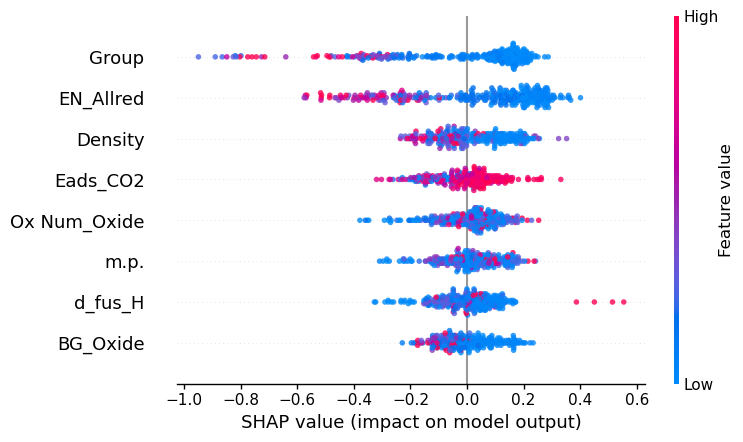

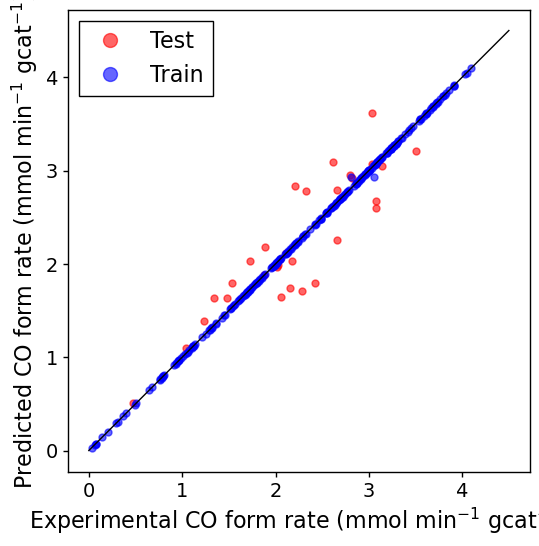

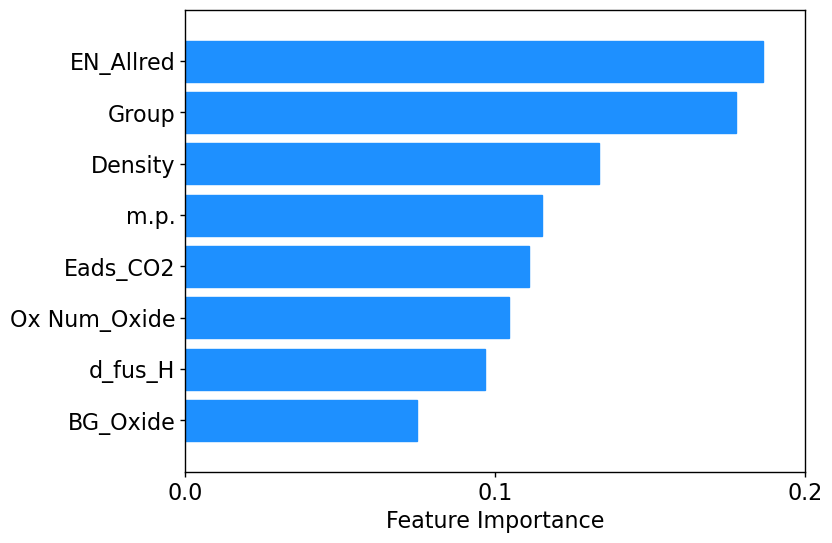

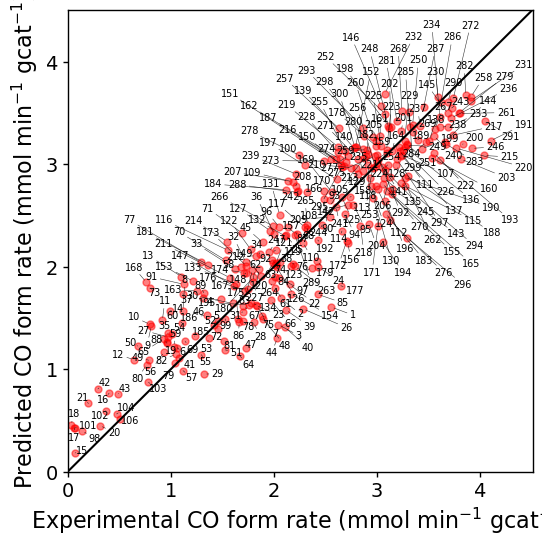

In [5]:
condition = conditions.calc_condition()
Reaction, data_sheet_name = condition['Reaction'], condition['data_sheet_name']
pgm_model, add_model, supp_model = condition['pgm_model'], condition['add_model'], condition['supp_model']


converted = analysis.analysis_data_convert(condition, data_sheet_name, use_models=[pgm_model, add_model, supp_model], idx=None)
feat, target = converted['feat'], converted['target']
feat_cols = feat.columns


model  = ExtraTreesRegressor(n_estimators=100, random_state=1107, n_jobs=-1)

analysis.shap_summary_plot(condition, model, feat, target, save=True)
analysis.one_shot_plot(condition, feat, target, model, Reaction, test_size=0.1, random_state=1107, save=True)
analysis.plot_importance(condition, model, labels=feat_cols, fig_size=(8,6), topk=20, color='dodgerblue', alpha=1, save=True)
analysis.loo_plot(condition, feat, target, feat_cols, model, save=True)

20220318 rwgs_250 all data


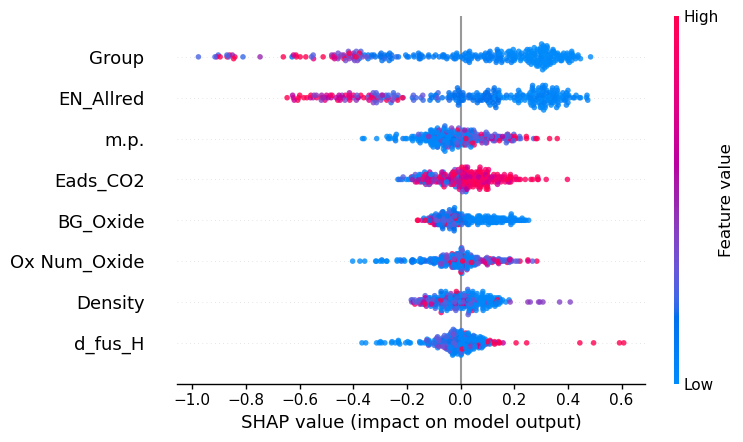

In [7]:
import shap

converted = analysis.analysis_data_convert(condition, data_sheet_name, use_models=[pgm_model, add_model, supp_model], idx=None)
feat, target = converted['feat'], converted['target']
feat_cols = feat.columns

model = ExtraTreesRegressor(n_estimators=100, random_state=1107, n_jobs=-1)
model.fit(feat, target)

explainer = shap.Explainer(model, feat)
shap_values = explainer(feat)

shap.summary_plot(
    shap_values,  features=feat, feature_names=feat.columns, max_display=15,
    plot_type='dot', color=None, axis_color='k', title=None, alpha=0.8,
    show=False, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20,
    class_names=None, class_inds=None, color_bar_label='Feature value',
    #cmap='cool',
    #cmap='cool_r',
    auto_size_plot=None, use_log_scale=False)